## Correlation Matrix

Looking at the correlation matrix of the best features (according to our feature selection algorithm), we can see that the following columns have a high correlation:
- RAB_mean and RAB_min (we're going to remove the RAB_min column)
- RAB_mean and RAB_max (we're going to remove the RAB_max column)
- ratio_RAB and RAB (we're going to remove the RAB)
- withdrawal_ration and mean_trans_profit (we're going to remove the withdrawal_ration)
- IC_mean and balance_mean (we're going to remove the IC_mean)
- RAB_sum and RAB (we're going to remove the RAB, as we said previously)
- CAB_min and ratio_CC (we're going to remove the CAB_min)
- CAB_min and CAB_max (we're going to remove CAB_min, as we said previously)
- CAB_max and CAB_sum (we're going to remove CAB_max)
- CAB_mean and CAB_sum (we're going to remove CAB_sum)

<AxesSubplot:>

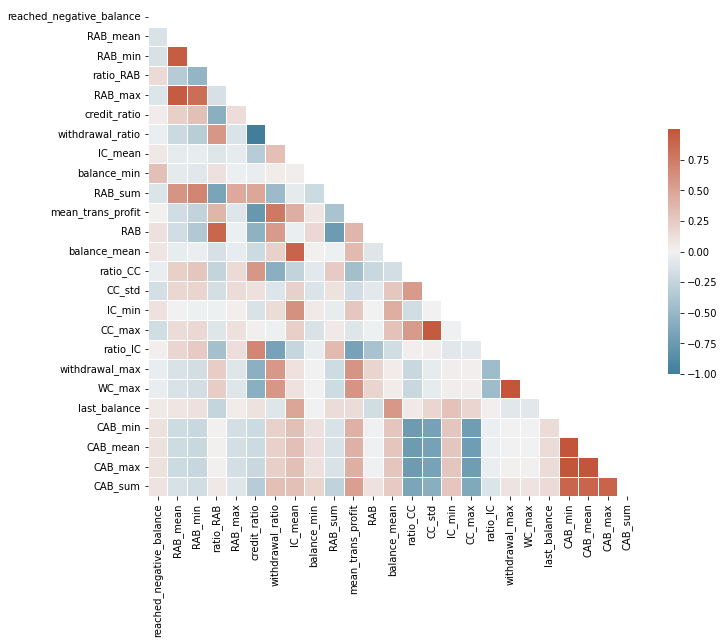

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./preprocessed/mergedTrainData.csv")

best_features = [
    'reached_negative_balance', 'RAB_mean', 'RAB_min', 'ratio_RAB', 'RAB_max', 'credit_ratio', 'withdrawal_ratio',
    'IC_mean', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'RAB', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max',
    'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_min', 'CAB_mean', 'CAB_max', 'CAB_sum'
]

corr = df[best_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')

# corr.style.background_gradient(cmap='coolwarm')

In [20]:
features_to_remove = ['RAB_min', 'RAB_max', 'RAB', 'withdrawal_ratio', 'IC_mean', 'CAB_min', 'CAB_max', 'CAB_sum']
selected_features = list(filter(lambda x: x not in features_to_remove, best_features))
print(selected_features)

['reached_negative_balance', 'RAB_mean', 'ratio_RAB', 'credit_ratio', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max', 'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_mean']


In [21]:
# plot = sns.relplot(y="amount", x="last_balance", hue="status", data=df)
# plot.fig.suptitle("Relation between last_balance and amount", verticalalignment="bottom", fontsize="14")

#scatterplot_graph(df=df, col1="amount", col2="last_balance", title="Relation between last_balance and amount")

Looking at this plot, we can observe that most of the successful loans are usually located on the left part of the chart, which means that people with low balances on their accounts are prone to not fail loan payments. Additionally, there is a big concentration of low amount loans that fail.

<AxesSubplot:xlabel='duration', ylabel='amount'>

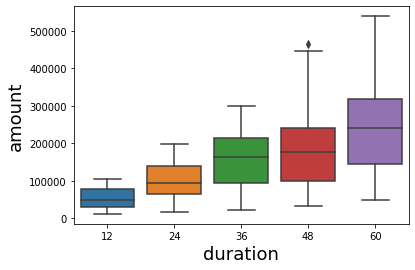

In [22]:
sns.boxplot(x="duration", y="amount", data=df)

As we can see in this plot, higher duration loans result typically in higher amounts.

In [23]:
#sns.pairplot(df[selected_features + ["status"]], hue="status", corner=True)

## Loan Relation Plots
Looking at the following plots, it is visible the correlation between the amount, payments and duration of the loan.

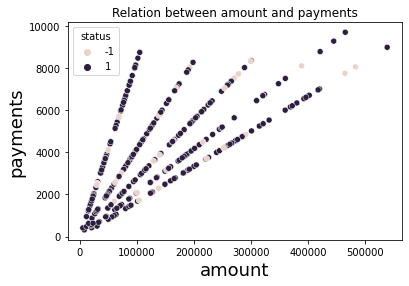

In [24]:
def scatterplot_graph(df, col1, col2, title, col_hue=None):
  if col_hue != None:
    sns.scatterplot(data=df, x=df[col1], y=df[col2], hue=col_hue).set_title(title)
  else:
    sns.scatterplot(data=df, x=df[col1], y=df[col2]).set_title(title)

loan_train_data = pd.read_csv("./files/loan_train.csv", sep=";")
scatterplot_graph(df=loan_train_data, col1="amount", col2="payments", title="Relation between amount and payments", col_hue="status")


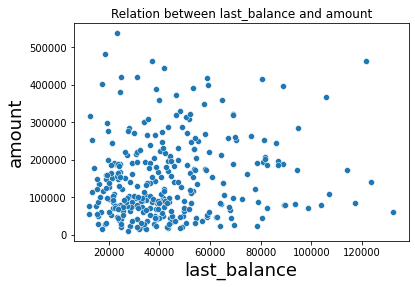

In [25]:
scatterplot_graph(df=df, col1="last_balance", col2="amount", title="Relation between last_balance and amount")

## Inter-Quartile Balance per Account and Last account Balance Relation

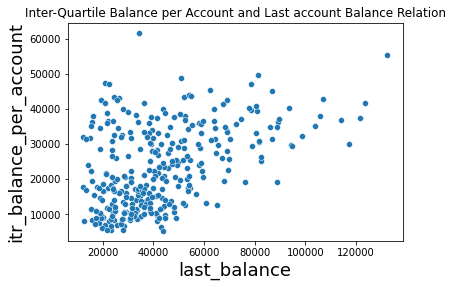

In [26]:
merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
scatterplot_graph(df=merged_data_train, col1="last_balance", col2="itr_balance_per_account", title="Inter-Quartile Balance per Account and Last account Balance Relation")

## Age Group Distribution

In [27]:
from sklearn.preprocessing import KBinsDiscretizer

def histplot_graph(df, title, no_bins='auto', col= None):
  if col is None:
    sns.histplot(data=df, bins=no_bins).set_title(title)
  else:
    sns.histplot(data=df, x=col, bins=no_bins).set_title(title)

# Statistical Methods

In [28]:
loan_train_data = pd.read_csv("./preprocessed/loan_train_data.csv", index_col=0)

amount_means = []
amount_stds = []

loan_years = [28, 27, 26, 25, 24]
print("----- Loan Train Data -----")
for year in loan_years:
  loan_data_year = loan_train_data[['amount']].loc[loan_train_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))
  amount_means.append(loan_data_year.describe()['amount']['mean'])
  amount_stds.append(loan_data_year.describe()['amount']['std'])
  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Train Data -----
Statistics for year: 1993
mean    134946.750000
std     106330.037717
Name: amount, dtype: float64


Statistics for year: 1994
mean    128015.636364
std      82298.725390
Name: amount, dtype: float64


Statistics for year: 1995
mean    148253.869565
std     119465.007096
Name: amount, dtype: float64


Statistics for year: 1996
mean    159630.358974
std     110518.943223
Name: amount, dtype: float64


Statistics for year: 1997
mean    128106.000000
std      72813.400415
Name: amount, dtype: float64




In [29]:
loan_test_data = pd.read_csv("./preprocessed/loan_test_data.csv", index_col=0)
loan_years = [24, 23, 22]

print("----- Loan Test Data -----")
for year in loan_years:
  loan_data_year = loan_test_data[['years_since_loan', 'amount']].loc[loan_test_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))

  calculated_mean = loan_data_year.describe()['amount']['mean']
  calculated_std = loan_data_year.describe()['amount']['std']
  if year == 24:
    amount_means[-1] = (amount_means[-1] + calculated_mean) / 2
    amount_stds[-1] = (amount_stds[-1] + calculated_std) / 2
  else:
    amount_means.append(calculated_mean)
    amount_stds.append(loan_data_year.describe()['amount']['std'])

  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Test Data -----
Statistics for year: 1997
mean    154044.131148
std     122682.226680
Name: amount, dtype: float64


Statistics for year: 1998
mean    160294.947368
std     117939.973407
Name: amount, dtype: float64


Statistics for year: 1999
mean   NaN
std    NaN
Name: amount, dtype: float64




### Loan Statistics
Through the gathering of statistics about loans, namely the mean, standard deviation, minimum and maximum amounts of loans for every year in the train and test datasets we conclude there was a huge variation in the standard deviation of amounts between 1993, 1994 and 1995 in the train dataset. This means the loan amounts were getting more spread out through the years. In 1996 and 1997 the spreading diminuished a bit but were still high comparing to 1993 and 1994. It's also important to note that through the years the average loan amount was growing when viewing train a test datasets independently. This is a metric that clearly demonstrates people were having greater debts.



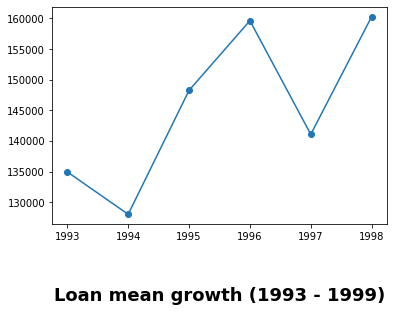

In [30]:
# Train data - Growing mean (1993 - 1999)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998", "1999"]
plt.scatter(train_years, amount_means)
plt.plot(train_years, amount_means)
plt.xlabel("\n\nLoan mean growth (1993 - 1999)", fontdict={"weight": "bold"})
plt.show()

ValueError: x and y must be the same size

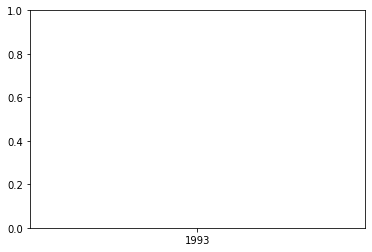

In [31]:
# Train data - Standar Deviation (1993 - 1999)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998", "1999"]
plt.scatter(train_years, amount_stds)
plt.plot(train_years, amount_stds)
plt.xlabel("\n\nStandard Deviation (1993 - 1999)", fontdict={"weight": "bold"})
plt.show()

### Transaction Statistics

In [ ]:
def trans_stats(df):
  credit_df = df.loc[df["type"] == "credit"]['amount']
  withdrawal_df = df.loc[df["type"] == "withdrawal"]['amount']

  credit_count = credit_df.describe()['count']
  credit_mean = credit_df.describe()['mean']

  withdrawal_count = withdrawal_df.describe()['count']
  withdrawal_mean = withdrawal_df.describe()['mean']

  return [credit_count, credit_mean, withdrawal_count, withdrawal_mean]

In [ ]:
trans_train_data = pd.read_csv("./files/trans_train.csv", sep=";")
[credit_count, credit_mean, withdrawal_count, withdrawal_mean] = trans_stats(trans_train_data)

In [ ]:
algorithms = ("Credit", "Withdrawal")

values = [credit_count, withdrawal_count]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Count vs Withdrawal Count")
plt.ylabel("Count")
plt.show()

In [ ]:
algorithms = ("Credit", "Withdrawal")

values = [credit_mean, withdrawal_mean]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Mean vs Withdrawal Mean")
plt.ylabel("Value")
plt.show()

For both the train and test data, the number of withdrawals is lower than the number of credits. But that doesn't mean the amount credited/withdrawn followed the same proportion. If that happened, people would bankrupt. And we can see that doesn't happen, comparing the mean credited value against the mean withdrawn value. The first is higher than the second, of course. It is expected that the credits transactions compensate the withdrawal transactions otherwise people wouldn't have any more money to move. Also, the standard deviation of credits is higher for credits than for withdrawals meaning that credit values are more spread out concerning the mean. 

# Feature histograms

In [ ]:

def get_feature_histogram(df, column, ax):
    loan = df[df.status==-1]
    do_not_loan = df[df.status==1]

    sns.histplot(do_not_loan[column], ax=ax, color='g', label = 'status = 1', kde=True)
    sns.histplot(loan[column], ax=ax, color='r', label = 'status = -1', kde=True)


# needs to have a len that is a perfect square
features_to_analyse = ["balance_mean", "last_balance", "amount", "ratio entrepeneurs", "credit_max", "criminality_growth"]

def get_features_histograms(df, columns, num_cols, num_rows):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))
    column_index = 0

    for i in range(num_rows):
        for j in range(num_cols):
            get_feature_histogram(ax=axs[i, j], df=df, column=columns[column_index])
            axs[i, j].set_title(f"{columns[column_index]} histogram", fontsize=25)
            axs[i, j].legend(loc="best", fontsize=18)
            plt.rc('axes', labelsize=18)
            column_index += 1
    
    fig.suptitle('Feature Analysis', fontsize=35)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
get_features_histograms(df=merged_data_train, columns=features_to_analyse, num_cols=3, num_rows=2)


Looking at this plot, we can see that people with lower balances tend to have successful loans. Additionally, it's possible to observe that a slighty higher ratio of entrepreneurs corresponds to more successful loans. The other plots are inconclusive.